\# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [87]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats as stats

In [5]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [6]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


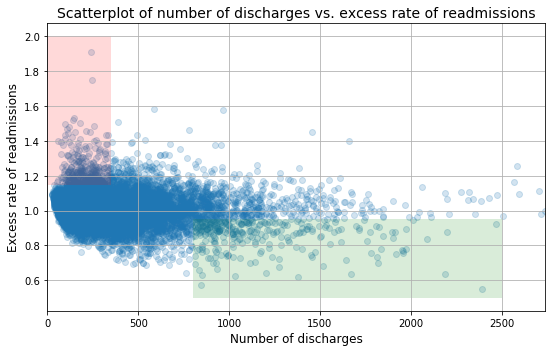

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

**Analysis of above work:**

I do not agree with the above analysis and recommendations for the following the reasons:

1. The above analysis is missing sound statistical analysis. The analysis that is included was based off of one graph that is too vague to be certain about the conclusions made by the author above. 
2. The author attempted to eliminate missing values from the 'Number of Discharges' column but failed to account for any value that was not 'Not Available' as well as any NaNs from the 'Excess readmission ratio' column. When these values were properly removed, the data set had nearly 100 fewer observations. 
3. In the analysis, there is no mention of a null hypothesis or alternative hypothesis, and as such, there are also no tests to confirm/reject the hypotheses. 
4. The author above cites a "significant correlation" in the conclusion but the data was not tested for statistical significance nor was a correlation coefficient calculated. 
5. The analysis above has conflicting statements in part B and part D. In part B, the author separates the hospitals into two arbitrary groups: those with less than 100 discharges and those with 1000 discharges. However, in the regulatory policy recommendations, the author redefines "small capacity" hospitals to be those with less than 300 discharges. 
6. Following with the issues in number 5, the author also fails to analyze the statistics for hospitals between 100 and 1000 discharges. 

In [51]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [12]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [17]:
df = clean_hospital_read_df
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [21]:
# Remove NaN values and isolate two relevant columns: number of discharges and excess readmission ratio
df = df[['Number of Discharges', 'Excess Readmission Ratio']].dropna()

#Rename columns
df.columns = ['Discharges', 'Readmission_ratio']

df.reset_index(drop=True)
df.Discharges = df.Discharges.astype(int)

In [22]:
df.describe()

,Discharges,Readmission_ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
Discharges           11497 non-null int32
Readmission_ratio    11497 non-null float64
dtypes: float64(1), int32(1)
memory usage: 224.6 KB


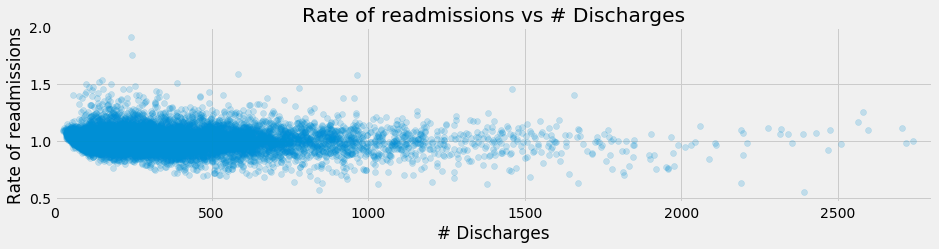

In [49]:
# Recreate plot Excess rate of readmissions vs Number of Discharges
_ = plt.figure(figsize=(14, 3))
_ = plt.scatter(x=df.Discharges, y=df.Readmission_ratio, alpha=0.2)
_ = plt.xlim(0, 2800)
_ = plt.xlabel('# Discharges')
_ = plt.ylabel('Rate of readmissions')
_ = plt.title('Rate of readmissions vs # Discharges')

plt.style.use('fivethirtyeight')

plt.show()

### Small Hospitals (<100 discharges)

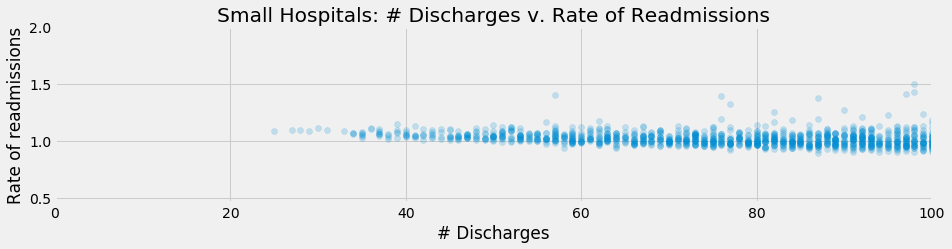

In [54]:
# Create graph for hospitals with less than 100 discharges
plt.figure(figsize=(14,3))
plt.scatter(x=df.Discharges, y=df.Readmission_ratio, alpha=0.2)
plt.xlim(0,100)
plt.xlabel('# Discharges')
plt.ylabel('Rate of readmissions')
plt.title('Small Hospitals: # Discharges v. Rate of Readmissions')

plt.show()

In [58]:
# small hospitals: <100 discharges

small_hospitals = df[df.Discharges<100]
small_hospitals.describe()

,Discharges,Readmission_ratio
count,1188.000000,1188.000000
mean,74.717172,1.022618
std,16.908819,0.057979
min,25.000000,0.893500
25%,62.000000,0.984900
50%,77.000000,1.017750
75%,89.000000,1.052925
max,99.000000,1.495300


Text(0.5, 1.0, 'Linear Regression for Small Hospitals')

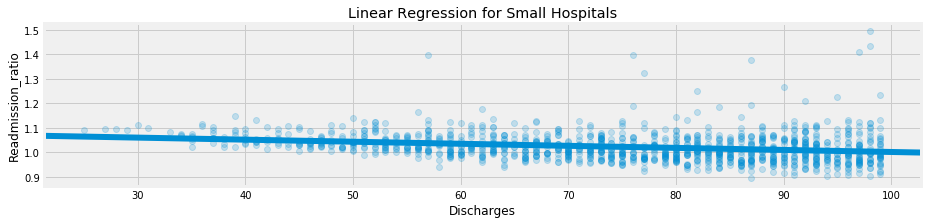

In [64]:
# Regress of number of discharges vs. rate of readmission for small hospitals
plt.figure(figsize=(14,3))
ax = sns.regplot(x='Discharges', y='Readmission_ratio', data=small_hospitals, scatter_kws={'alpha':0.2})
ax.set_title('Linear Regression for Small Hospitals')

### Medium hospitals (100-1,000 discharges)

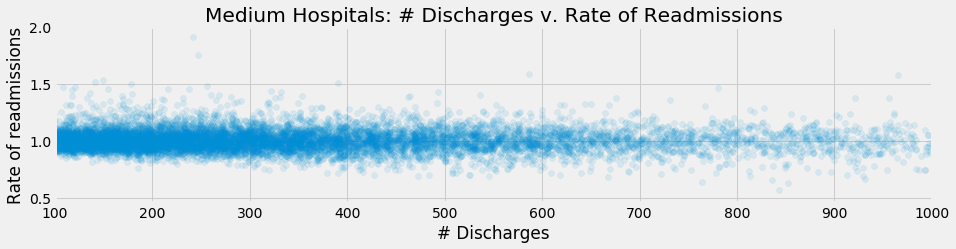

In [56]:
# Create chart for middle-sized hospitals
plt.figure(figsize=(14,3))
plt.scatter(x=df.Discharges, y=df.Readmission_ratio, alpha=0.1)
plt.xlim(100,1000)
plt.xlabel('# Discharges')
plt.ylabel('Rate of readmissions')
plt.title('Medium Hospitals: # Discharges v. Rate of Readmissions')

plt.show()

In [67]:
# Medium hospitals: 100-1000 discharges

medium_hospitals = df[(df.Discharges>=100) & (df.Discharges<=1000)]
medium_hospitals.describe()

,Discharges,Readmission_ratio
count,9846.000000,9846.000000
mean,352.678651,1.007052
std,205.650730,0.093417
min,100.000000,0.574800
25%,189.000000,0.949000
50%,300.000000,1.001400
75%,470.000000,1.059550
max,1000.000000,1.909500


Text(0.5, 1.0, 'Linear Regression for Medium Hospitals')

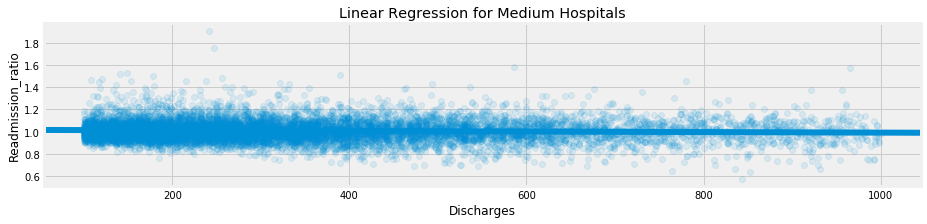

In [69]:
# Regression of number of discharges vs. rate of readmission for medium hospitals
plt.figure(figsize=(14,3))
ax = sns.regplot(x='Discharges', y='Readmission_ratio', data=medium_hospitals, scatter_kws={'alpha':0.1})
ax.set_title('Linear Regression for Medium Hospitals')

### Large Hospitals (>1,000 discharges)

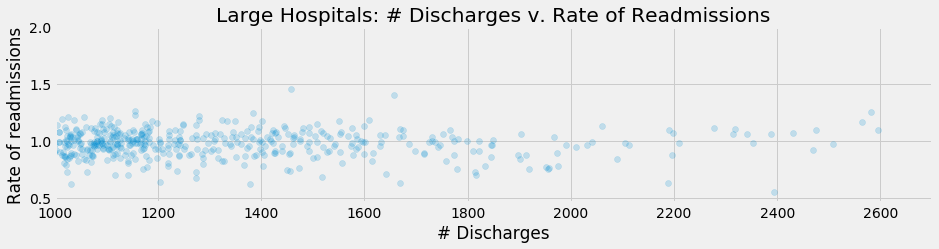

In [57]:
# Create chart for large hospitals (over 1,000 discharges)
plt.figure(figsize=(14,3))
plt.scatter(x=df.Discharges, y=df.Readmission_ratio, alpha=0.2)
plt.xlim(1000,2700)
plt.xlabel('# Discharges')
plt.ylabel('Rate of readmissions')
plt.title('Large Hospitals: # Discharges v. Rate of Readmissions')

plt.show()

In [70]:
# large hospitals: <1,000 discharges

large_hospitals = df[df.Discharges>1000]
large_hospitals.describe()

,Discharges,Readmission_ratio
count,463.000000,463.000000
mean,1383.427646,0.978335
std,459.109724,0.120007
min,1002.000000,0.549500
25%,1107.000000,0.907900
50%,1242.000000,0.986400
75%,1512.000000,1.057100
max,6793.000000,1.454300


Text(0.5, 1.0, 'Linear Regression for Large Hospitals')

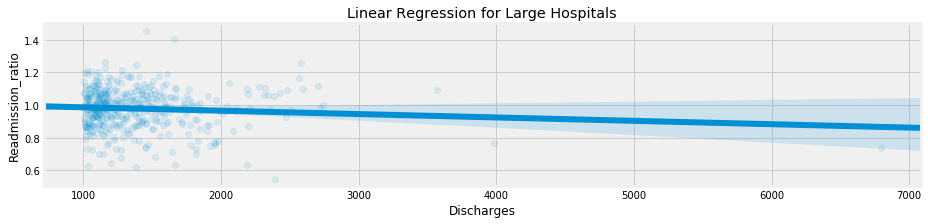

In [71]:
# Regression of number of discharges vs. rate of readmission for large hospitals
plt.figure(figsize=(14,3))
ax = sns.regplot(x='Discharges', y='Readmission_ratio', data=large_hospitals, scatter_kws={'alpha':0.1})
ax.set_title('Linear Regression for Large Hospitals')

In [86]:
# Calculate means for all groups:
sm = np.mean(small_hospitals.Readmission_ratio)
md = np.mean(medium_hospitals.Readmission_ratio)
lg = np.mean(large_hospitals.Readmission_ratio)

# Find differences
diff1 = sm-md
diff2 = sm-lg
diff3 = md-lg

print('Trimmed Means\n\nSmall Hospitals: {:0.5}\nMedium Hospitals: {:0.5}\nLarge Hospitals: {:0.5}\n'.format(sm, md, lg))
print('Differences\n\nSmall-Medium: {:0.5}\nMedium-Large: {:0.5}\nSmall-Large: {:0.5}'.format(diff1, diff2, diff3))

Trimmed Means

Small Hospitals: 1.0226
Medium Hospitals: 1.0071
Large Hospitals: 0.97834

Differences

Small-Medium: 0.015567
Medium-Large: 0.044283
Small-Large: 0.028716


## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1. Setup an appropriate hypothesis test.
2. Compute and report the observed significance value (or p-value).
3. Report statistical significance for  𝛼  = .01.
4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
5. Look at the scatterplot above.
    - What are the advantages and disadvantages of using this plot to convey information?
    - Construct another plot that conveys the same information in a more direct manner.

### Hypothesis

- Null hypothesis (Ho): There is no correlation between the number of discharges and a hospital's readmission rate
- Alternate hypothesis (Ha): There is a correlation between the number of discharges and a hospital's readmission rate

### Statistical significance

In [88]:
# Calculate the correlation coefficient
r = np.corrcoef(df.Discharges, df.Readmission_ratio)[0][1]

# Calculate t-statistic and p-value
n = len(df.Discharges)
t_stat = r*np.sqrt(n-2)/np.sqrt(1-r**2)
p_value = stats.t.cdf(x=t_stat, df = n-2)

print('observed r: \t {:0.5}\nt-statistic: {:0.5}\np_value: {:0.5}'.format(r, t_stat, p_value))

observed r: 	 -0.097398
t-statistic: -10.492
p_value: 6.1127e-26


Looking at the p-value, it is very close to zero, leading to the rejection of the null hypothesis. The correlation coefficient (observed r) is -0.097, indicating a very, very slight negative correlation between the size of the hospital and its excess readmission rates (readmission rates decrease slightly as the number of discharges increases).

Based on the very small correlation, I disagree with the author's recommendation that smaller hospitals should be consolidated. The correlation is small enough that it may not reduce excessive readmissions to justify the cost of consolidation. 

### Scatterplot

Looking at the scatterplot above, there are a couple advantages and many disadvantages. The advantage is that the reader can see all of the data, clustered together with the colored rectangles highlighting areas of note. It's adequately labelled and the opacity of the points is nice as it allows the viewer to see data points that overlap.However, the disadvantages are numerous as the data is highly clustered and the regression line is not mapped to give the reader a sense of the trends in the data. 

A better style of plot to use would be a jointplot, which displays the peaks on the top and right edges of the graph and has the ability to map the regression line. This type of plot provides more clarity and is less confusing to the reader. 

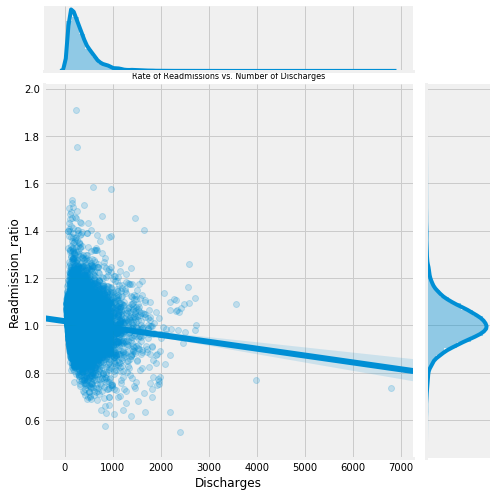

In [98]:
_ = sns.jointplot('Discharges', 'Readmission_ratio', data=df, kind = 'reg', height = 7, scatter_kws = {'alpha' : 0.2})
_ = plt.title('Rate of Readmissions vs. Number of Discharges', size=8)